In [34]:
# 모두의 딥러닝

In [35]:
# 18장 시퀀스 배열로 다루는 순환 신경망 (RNN)

In [36]:
# 18-1 LSTM을 이용한 로이터 뉴스 카테고리 분류하기

In [37]:
# 문장은 여러 개의 단어로 이루어져있는데, 그 의미를 전달하려면 각 단어가 정해진 순서대로 입력되어야 함
# 과거에 입력된 데이터와 나중에 입력된 데이터 사이의 관계를 고려해야 함
# 순환 신경망
# 여러 개의 데이터가 순서대로 입력되었을 때 앞서 입력받은 데이트를 잠시 기억해 놓는 방법

In [38]:
from tensorflow.keras.datasets import reuters

In [39]:
(X_train, y_train),(X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [40]:
import numpy as np

category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [41]:
# 패딩
from tensorflow.keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [42]:
# 원-핫 인코딩
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [43]:
# 모델 구조 설정
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding

model = Sequential()
model.add(Embedding(1000,100))
# -> 데이터 전처리 과정을 통해 입력된 값ㅇ르 받아 다음 층이 알 수 있는 형태로 변환
model.add(LSTM(100, activation='tanh'))
# -> RNN에서 기억 값에 대한 가중치를 제어
model.add(Dense(46,activation='softmax'))

In [44]:
# 모델 실행 옵션 정함
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

# 학습의 조기 중단 설정
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델 실행
history = model.fit(X_train, y_train, batch_size=20, epochs=200, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 6s 10ms/step - loss: 2.1314 - accuracy: 0.4679 - val_loss: 1.8515 - val_accuracy: 0.5423
Epoch 2/200
450/450 [==============================] - 4s 8ms/step - loss: 1.7219 - accuracy: 0.5670 - val_loss: 1.9350 - val_accuracy: 0.5565
Epoch 3/200
450/450 [==============================] - 4s 9ms/step - loss: 1.6080 - accuracy: 0.5890 - val_loss: 1.5969 - val_accuracy: 0.5886
Epoch 4/200
450/450 [==============================] - 4s 8ms/step - loss: 1.4135 - accuracy: 0.6479 - val_loss: 1.5157 - val_accuracy: 0.6118
Epoch 5/200
450/450 [==============================] - 4s 8ms/step - loss: 1.2483 - accuracy: 0.6860 - val_loss: 1.3293 - val_accuracy: 0.6705
Epoch 6/200
450/450 [==============================] - 4s 8ms/step - loss: 1.1379 - accuracy: 0.7136 - val_loss: 1.2598 - val_accuracy: 0.6848
Epoch 7/200
450/450 [==============================] - 4s 8ms/step - loss: 1.0368 - accuracy: 0.7363 - val_loss: 1.2096 - val_accuracy: 0.703

In [45]:
# 테스트의 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 0s 6ms/step - loss: 1.3258 - accuracy: 0.7195

 Test Accuracy: 0.7195


In [46]:
# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

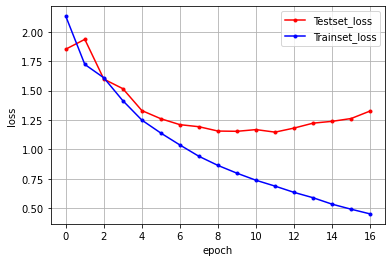

In [47]:
# 그래프로 표현
import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.',c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.',c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [48]:
# 18-2 LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt


(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)


X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)


model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_2 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_2 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 55)                26400     
                                                                 
 dense_4 (Dense)             (None, 1)                 56        
                                                      

In [65]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
469/469 [==============================] - 15s 13ms/step - loss: 0.4102 - accuracy: 0.7957 - val_loss: 0.3111 - val_accuracy: 0.8789
Epoch 2/100
469/469 [==============================] - 5s 12ms/step - loss: 0.2360 - accuracy: 0.9098 - val_loss: 0.2644 - val_accuracy: 0.8902
Epoch 3/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1866 - accuracy: 0.9291 - val_loss: 0.2982 - val_accuracy: 0.8707
Epoch 4/100
469/469 [==============================] - 5s 11ms/step - loss: 0.1505 - accuracy: 0.9475 - val_loss: 0.2848 - val_accuracy: 0.8893
Epoch 5/100
782/782 [==============================] - 3s 4ms/step - loss: 0.3377 - accuracy: 0.8789

 Test Accuracy: 0.8789


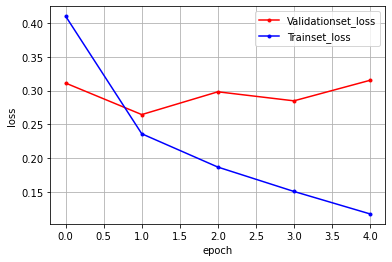

In [67]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [68]:
#18-3 어텐션을 사용한 신경망

In [69]:
!pip install attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt 

In [75]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [76]:
model = Sequential()
model.add(Embedding(5000,500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 500)         2500000   
                                                                 
 dropout_3 (Dropout)         (None, None, 500)         0         
                                                                 
 lstm_5 (LSTM)               (None, None, 64)          144640    
                                                                 
 attention (Attention)       (None, 128)               20480     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
 activation_3 (Activation)   (None, 1)                

In [78]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
625/625 [==============================] - 22s 33ms/step - loss: 0.3852 - accuracy: 0.8257 - val_loss: 0.2899 - val_accuracy: 0.8802
Epoch 2/100
625/625 [==============================] - 20s 33ms/step - loss: 0.2254 - accuracy: 0.9115 - val_loss: 0.2844 - val_accuracy: 0.8832
Epoch 3/100
625/625 [==============================] - 21s 33ms/step - loss: 0.1654 - accuracy: 0.9358 - val_loss: 0.2951 - val_accuracy: 0.8842
Epoch 4/100
625/625 [==============================] - 21s 33ms/step - loss: 0.1198 - accuracy: 0.9538 - val_loss: 0.3446 - val_accuracy: 0.8821
Epoch 5/100
782/782 [==============================] - 9s 11ms/step - loss: 0.4219 - accuracy: 0.8812

 Test Accuracy: 0.8812


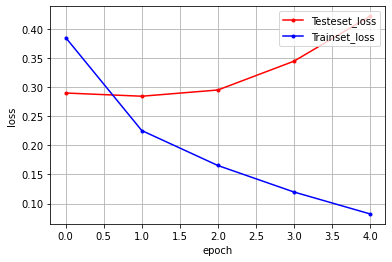

In [79]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testeset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()